In [1]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from pandas import DataFrame

#Cleaning data

aut = pd.read_csv('Data.txt')

aut.columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
             'body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight',
             'engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
             'horsepower','peak-rpm','city-mpg','highway-mpg','price']

aut = aut.fillna(0) #filling NA values with 0
aut = aut.replace(to_replace='?',value=0) #replacing symbols with 0 value
aut['avg-mpg']=aut[['city-mpg','highway-mpg']].mean(axis=1) #creating attribute avg-mpg which is the average of two columns


#converting object data type into floats and integers
aut['normalized-losses'] = aut['normalized-losses'].astype(int)
aut['bore'] = aut['bore'].astype(float)
aut['stroke'] = aut['stroke'].astype(float)
aut['horsepower'] = aut['horsepower'].astype(int)
aut['peak-rpm'] = aut['peak-rpm'].astype(int)
aut['price'] = aut['price'].astype(int)
aut.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,furl-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg-mpg
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,24.0
1,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.5
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,27.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,20.0
4,2,0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,22.0


In [649]:
print(aut.columns)
print('\n')
print(aut.shape)
print('\n')
print(aut.dtypes)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'avg-mpg'],
      dtype='object')


(205, 27)


symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
s

In [9]:
aut_summary = round(aut.describe(),2)
aut_summary

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg-mpg
count,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00
mean,0.82,98.08,98.81,174.08,65.92,53.75,2555.60,126.89,3.26,3.19,10.15,103.20,5075.74,25.24,30.77,12946.75,28.00
std,1.24,58.02,5.99,12.36,2.15,2.42,521.96,41.74,0.54,0.55,3.98,40.93,696.34,6.55,6.90,8098.83,6.68
min,-2.00,0.00,86.60,141.10,60.30,47.80,1488.00,61.00,0.00,0.00,7.00,0.00,0.00,13.00,16.00,0.00,15.00
25%,0.00,77.75,94.50,166.30,64.07,52.00,2145.00,97.00,3.12,3.11,8.57,70.00,4800.00,19.00,25.00,7669.00,22.38
50%,1.00,103.00,97.00,173.20,65.50,54.10,2414.00,119.50,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10096.50,27.00
75%,2.00,137.00,102.40,183.20,66.90,55.50,2939.25,142.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.50,16500.00,32.38
max,3.00,256.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00,51.50


In [58]:
vehicle_count=aut.make.value_counts()
vehicle_count

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64

In [59]:
#Overall statistics of vehicles
overall_stats = aut.groupby('make').mean()
overall_stats

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg-mpg
make,,,,,,,,,,,,,,,,,
alfa-romero,2.000000,0.000000,91.550000,170.000000,64.800000,50.600000,2685.500000,141.000000,3.075000,3.075000,9.000000,132.500000,5000.000000,20.000000,26.500000,16500.000000,23.250000
audi,1.285714,92.000000,102.271429,183.828571,68.714286,54.428571,2800.714286,130.714286,3.172857,3.400000,8.400000,121.000000,5500.000000,18.857143,24.142857,15307.857143,21.500000
bmw,0.375000,95.000000,103.162500,184.500000,66.475000,54.825000,2929.375000,166.875000,3.473750,3.167500,8.575000,138.875000,5068.750000,19.375000,25.375000,26118.750000,22.375000
chevrolet,1.000000,100.000000,92.466667,151.933333,62.500000,52.400000,1757.000000,80.333333,2.990000,3.083333,9.566667,62.666667,5300.000000,41.000000,46.333333,6007.000000,43.666667
dodge,1.000000,133.444444,95.011111,160.988889,64.166667,51.644444,2151.333333,102.666667,3.094444,3.365556,8.634444,86.333333,5388.888889,28.000000,34.111111,7875.444444,31.055556
honda,0.615385,103.000000,94.330769,160.769231,64.384615,53.238462,2096.769231,99.307692,3.021538,3.462308,9.215385,80.230769,5753.846154,30.384615,35.461538,8184.692308,32.923077
isuzu,0.750000,0.000000,94.825000,163.775000,63.550000,52.225000,2213.500000,102.500000,3.200000,3.170000,9.225000,77.000000,5150.000000,31.000000,36.000000,4458.250000,33.500000
jaguar,0.000000,48.333333,109.333333,196.966667,69.933333,51.133333,4027.333333,280.666667,3.600000,3.700000,9.233333,204.666667,4833.333333,14.333333,18.333333,34600.000000,16.333333
mazda,1.117647,109.352941,97.017647,170.805882,65.588235,53.358824,2297.823529,103.000000,2.513529,2.522941,10.488235,85.529412,5108.823529,25.705882,31.941176,10652.882353,28.823529


In [12]:
round(aut.corr(),2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg-mpg
symboling,1.00,0.21,-0.53,-0.36,-0.23,-0.53,-0.23,-0.11,-0.28,-0.20,-0.18,0.06,0.18,-0.03,0.04,-0.07,0.01
normalized-losses,0.21,1.00,-0.21,-0.24,-0.21,-0.19,-0.26,-0.30,-0.21,-0.15,-0.07,-0.18,0.24,0.15,0.17,-0.24,0.16
wheel-base,-0.53,-0.21,1.00,0.88,0.80,0.58,0.78,0.57,0.32,0.15,0.25,0.36,-0.22,-0.48,-0.55,0.58,-0.52
length,-0.36,-0.24,0.88,1.00,0.84,0.49,0.88,0.68,0.36,0.12,0.16,0.53,-0.23,-0.67,-0.71,0.69,-0.70
width,-0.23,-0.21,0.80,0.84,1.00,0.27,0.87,0.74,0.30,0.11,0.18,0.62,-0.17,-0.65,-0.68,0.70,-0.67
height,-0.53,-0.19,0.58,0.49,0.27,1.00,0.30,0.07,0.30,0.16,0.26,-0.10,-0.20,-0.06,-0.11,0.16,-0.09
curb-weight,-0.23,-0.26,0.78,0.88,0.87,0.30,1.00,0.85,0.36,0.13,0.15,0.73,-0.18,-0.76,-0.80,0.80,-0.78
engine-size,-0.11,-0.30,0.57,0.68,0.74,0.07,0.85,1.00,0.45,0.27,0.03,0.78,-0.18,-0.65,-0.68,0.84,-0.67
bore,-0.28,-0.21,0.32,0.36,0.30,0.30,0.36,0.45,1.00,0.70,0.03,0.26,-0.27,-0.14,-0.16,0.26,-0.15
stroke,-0.20,-0.15,0.15,0.12,0.11,0.16,0.13,0.27,0.70,1.00,0.13,0.00,-0.27,0.12,0.10,0.05,0.11


In [13]:
#Price Analysis

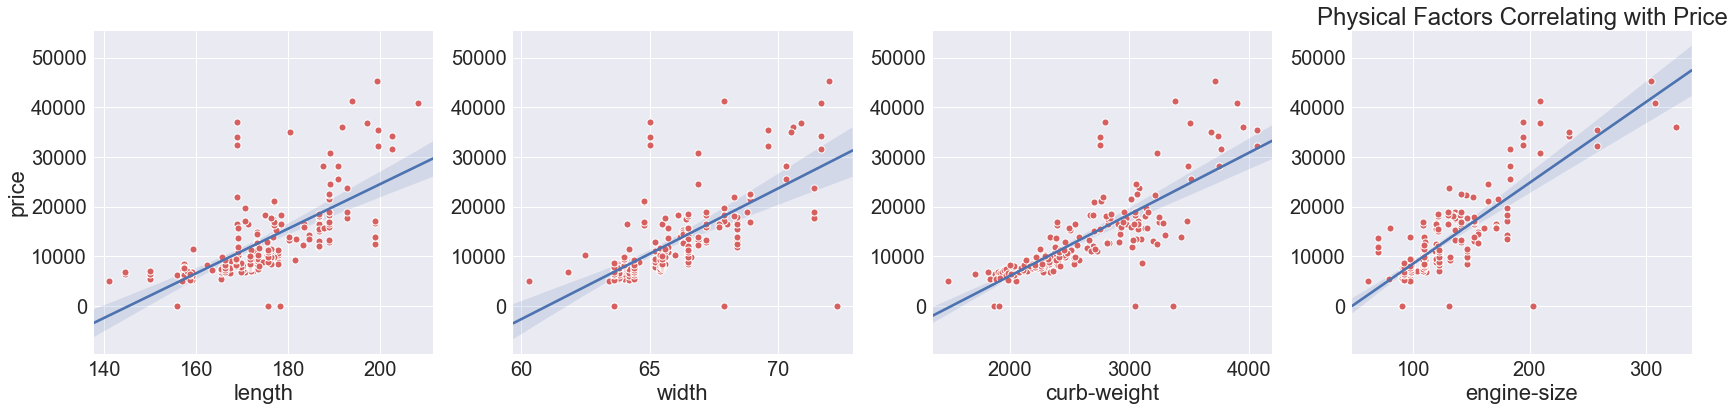

In [71]:
#what are the features of a car that correlate with the price?
a = sns.PairGrid(aut, x_vars=["length", "width", "curb-weight","engine-size"], y_vars=["price"],size=6)
#taking the attributes length, width, curb-weight, engine-size on x-axis and price on y-axis 
#size is how bigger the plot should be
a = a.map(sns.regplot)
#mapping the data into a regression plot of seaborn
a = a.map(plt.scatter, linewidths=1, edgecolor="w", s=50, color='r')
#the mapping parameters i.e scatter plot with line width-1 and all other parameters
a = sns.set(font_scale=2)
#the size of the heading
plt.title('Physical Factors Correlating with Price')
#the title of the plot
plt.show()

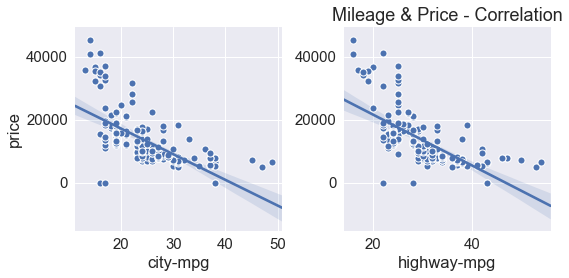

In [15]:
b = sns.PairGrid(aut, x_vars=["city-mpg", "highway-mpg"], y_vars=["price"],size=4)
b = b.map(sns.regplot)
b = b.map(plt.scatter, linewidths=1, edgecolor="w", s=50)
b = sns.set(font_scale=1.5)
plt.title('Mileage & Price - Correlation')
plt.show()

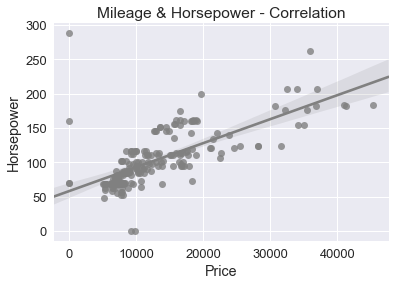

In [74]:
#Price analysis
c = sns.regplot(x='price', y='horsepower', data=aut, color='.5')
c = plt.title('Mileage & Horsepower - Correlation')
c = plt.xlabel('Price')
c = plt.ylabel('Horsepower')
c = sns.set(font_scale=1.3)
plt.show()

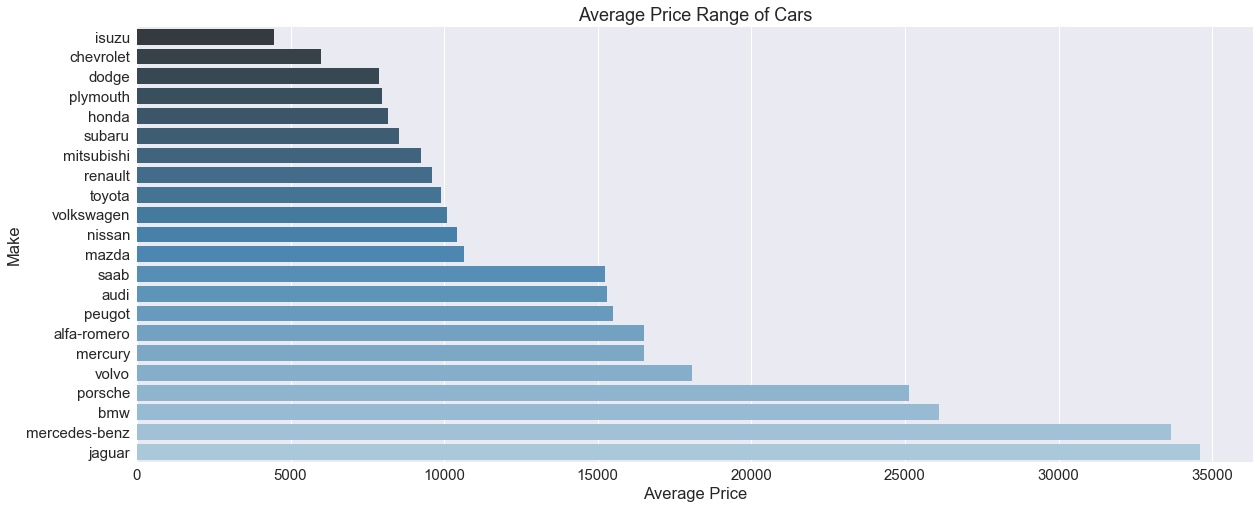

In [80]:
price_table = pd.pivot_table(aut, values='price', index='make', aggfunc=np.mean)
#this line takes the average of each maker's price
#and you will end up with the brand and its average price

price_table = price_table.sort_values(by='price', ascending=True)
#sort the dataframe by price and then in ascending order

price_table = price_table.reset_index()
#resetting index will bring the maker as a column

price_table = round(price_table,2)

plt.figure(figsize=(20,8)) #figure size


sns.barplot(data=price_table, y='make', x='price', palette = 'Blues_d')
price_table = sns.set(font_scale = 1.5)
plt.title('Average Price Range of Cars')
plt.xlabel('Average Price')
plt.ylabel('Make')
plt.show()

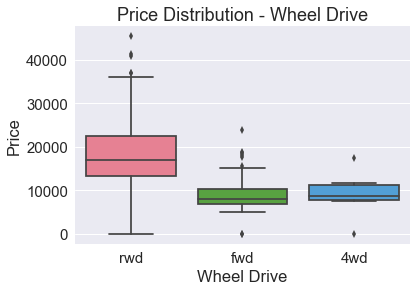

In [19]:
#Price range of RWD, FWD and 4WD
d = sns.boxplot(x="drive-wheels", y="price", data=aut, palette='husl')
d = sns.set(font_scale=1.5)
plt.title('Price Distribution - Wheel Drive')
plt.xlabel('Wheel Drive')
plt.ylabel('Price')
plt.show()

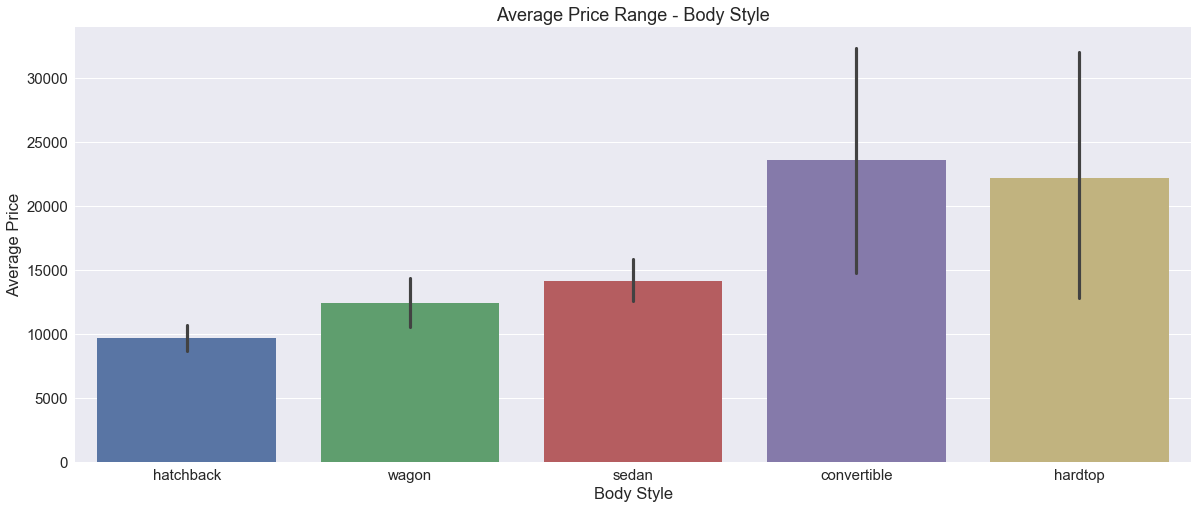

In [20]:
#Which body style is the most expensive?
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
sns.barplot(data=aut, x='body-style', y='price', order=['hatchback','wagon','sedan','convertible','hardtop'] )
plt.xlabel('Body Style')
plt.ylabel('Average Price')
plt.title('Average Price Range - Body Style')

plt.show()

In [21]:
#Best performing low cost car

In [22]:
price_table1 = pd.pivot_table(aut, values='price', index='make', aggfunc=np.max)
price_table1 = price_table1.sort_values(by='price', ascending=True)
round(price_table1,2)

economic_cars = price_table1.head(12)
economic_cars

,price
make,
chevrolet,6575
renault,9895
isuzu,11048
subaru,11694
plymouth,12764
honda,12945
dodge,12964
volkswagen,13845
mitsubishi,14869


In [23]:
#analysing the performance of economical vehicles
economy_stats = aut.groupby('make').max()
economy_stats = economy_stats.sort_values(by='price', ascending = True)
economy_stats = economy_stats.head(12)
#economy_stats = DataFrame(economy_stats)
economy_stats = economy_stats.reset_index()


economy_stats

,make,symboling,normalized-losses,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,...,furl-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg-mpg
0,chevrolet,2,121,gas,std,sedan,fwd,front,94.5,158.8,...,2bbl,3.03,3.11,9.60,70,5400,47,53,6575,50.0
1,renault,2,0,gas,std,wagon,fwd,front,96.1,181.5,...,mpfi,3.46,3.90,8.70,0,0,23,31,9895,27.0
2,isuzu,2,0,gas,std,sedan,rwd,front,96.0,172.6,...,spfi,3.43,3.23,9.60,90,5400,38,43,11048,40.5
3,subaru,2,102,gas,turbo,wagon,fwd,front,97.2,173.6,...,mpfi,3.62,2.64,9.50,111,5200,32,37,11694,34.5
4,plymouth,3,154,gas,turbo,wagon,rwd,front,103.3,174.6,...,spdi,3.59,3.86,9.40,145,5500,37,41,12764,39.0
5,honda,2,137,gas,std,wagon,fwd,front,96.5,175.4,...,mpfi,3.15,3.58,10.10,101,6000,49,54,12945,51.5
6,dodge,3,148,gas,turbo,wagon,fwd,front,103.3,174.6,...,mpfi,3.60,3.90,9.41,145,5500,37,41,12964,39.0
7,volkswagen,3,256,gas,turbo,wagon,fwd,front,100.4,183.1,...,mpfi,3.19,3.40,23.00,110,5500,37,46,13845,41.5
8,mitsubishi,3,161,gas,turbo,sedan,fwd,front,96.3,173.2,...,spdi,3.59,3.86,9.40,145,5500,37,41,14869,39.0
9,alfa-romero,3,0,gas,std,hatchback,rwd,front,94.5,171.2,...,mpfi,3.47,3.47,9.00,154,5000,21,27,16500,24.0


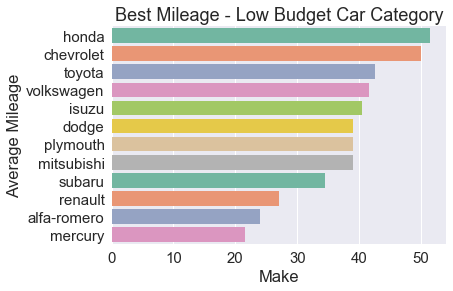

In [24]:
sns.barplot(data=economy_stats, y='make', x='avg-mpg', order = ['honda', 'chevrolet','toyota','volkswagen',
                                                                'isuzu', 'dodge','plymouth','mitsubishi','subaru','renault','alfa-romero','mercury'], palette = 'Set2')

plt.xlabel('Make')
plt.ylabel('Average Mileage')
plt.title('Best Mileage - Low Budget Car Category')
sns.set(font_scale=1.2)
plt.show()

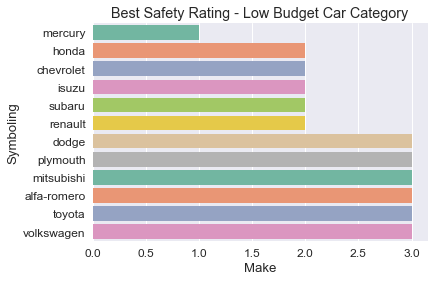

In [25]:
sns.barplot(data=economy_stats, y='make', x='symboling', order = ['mercury','honda', 'chevrolet','isuzu','subaru','renault',
                                                                 'dodge','plymouth','mitsubishi','alfa-romero','toyota','volkswagen'], palette = 'Set2')
plt.xlabel('Make')
plt.ylabel('Symboling')
plt.title('Best Safety Rating - Low Budget Car Category')
sns.set(font_scale=1.2)
plt.show()

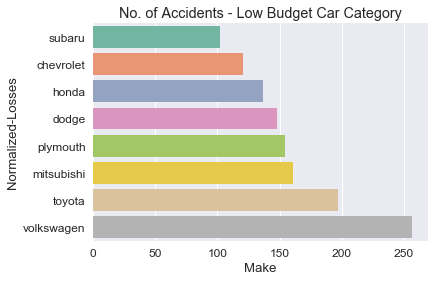

In [26]:
sns.barplot(data=economy_stats, y='make', x='normalized-losses', order = ['subaru','chevrolet','honda','dodge','plymouth','mitsubishi','toyota',
                                                                  'volkswagen'], palette = 'Set2')
plt.xlabel('Make')
plt.ylabel('Normalized-Losses')
plt.title('No. of Accidents - Low Budget Car Category')
sns.set(font_scale=1.2)
plt.show()

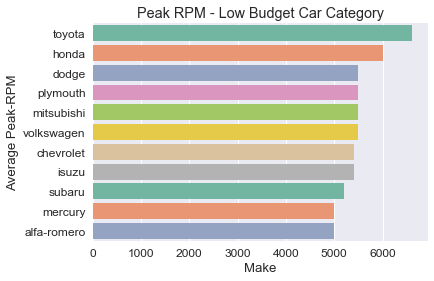

In [27]:
sns.barplot(data=economy_stats, y='make', x='peak-rpm', order = ['toyota','honda','dodge','plymouth','mitsubishi','volkswagen','chevrolet','isuzu','subaru','mercury', 
                                                                 'alfa-romero'], palette = 'Set2')
plt.xlabel('Make')
plt.ylabel('Average Peak-RPM')
plt.title('Peak RPM - Low Budget Car Category')
sns.set(font_scale=1.2)
plt.show()

In [28]:
#Mileage Analysis

In [37]:
aut.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'furl-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'avg-mpg'],
      dtype='object')

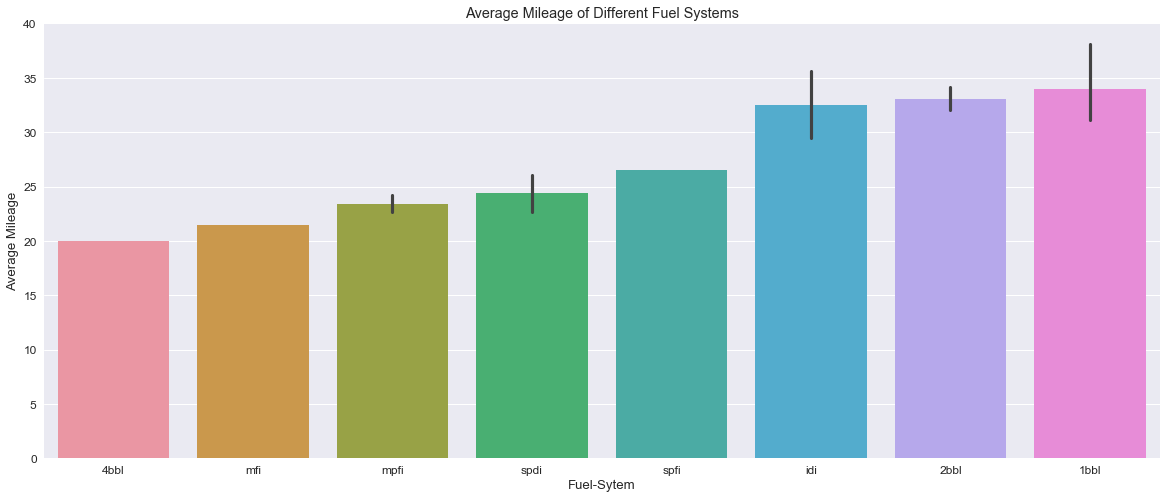

In [38]:
plt.figure(figsize=(20,8))

sns.barplot(data=aut, x='fuel-system', y='avg-mpg',  order = ['4bbl','mfi','mpfi','spdi','spfi','idi','2bbl','1bbl'])
plt.xlabel('Fuel-Sytem')
plt.ylabel('Average Mileage')
plt.title('Average Mileage of Different Fuel Systems')
sns.set(font_scale= 1.3)

plt.show()

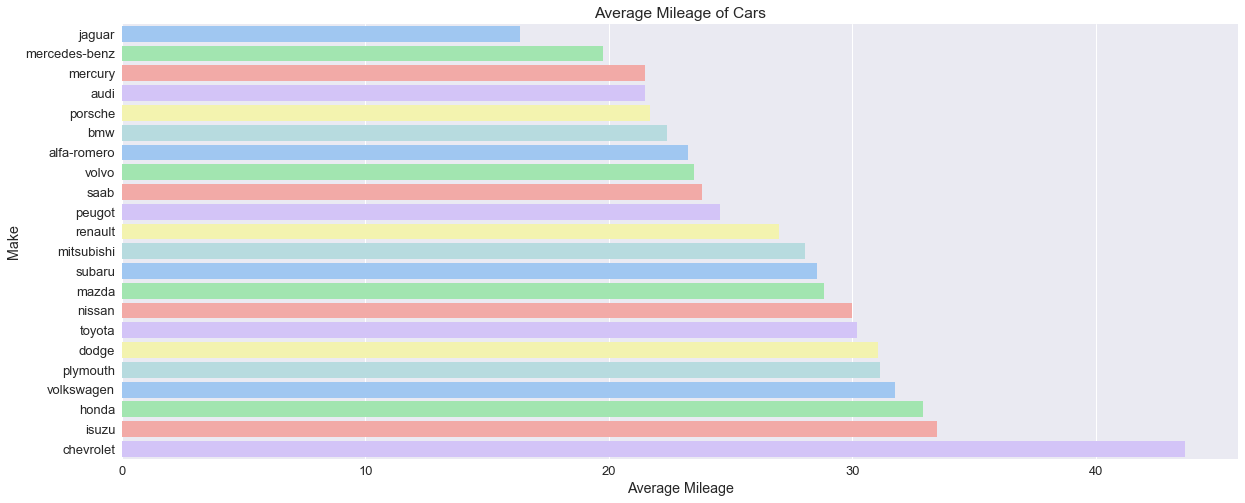

In [39]:
mpg_table = pd.pivot_table(aut, values='avg-mpg', index='make', aggfunc=np.mean)
mpg_table = mpg_table.sort_values(by='avg-mpg', ascending=True)
mpg_table = mpg_table.reset_index()
round(mpg_table,2)

plt.figure(figsize=(20,8))
sns.barplot(data=mpg_table, y='make', x='avg-mpg', palette='pastel')
plt.xlabel('Average Mileage')
plt.ylabel('Make')
plt.title('Average Mileage of Cars')
sns.set(font_scale=1.7)
plt.show()

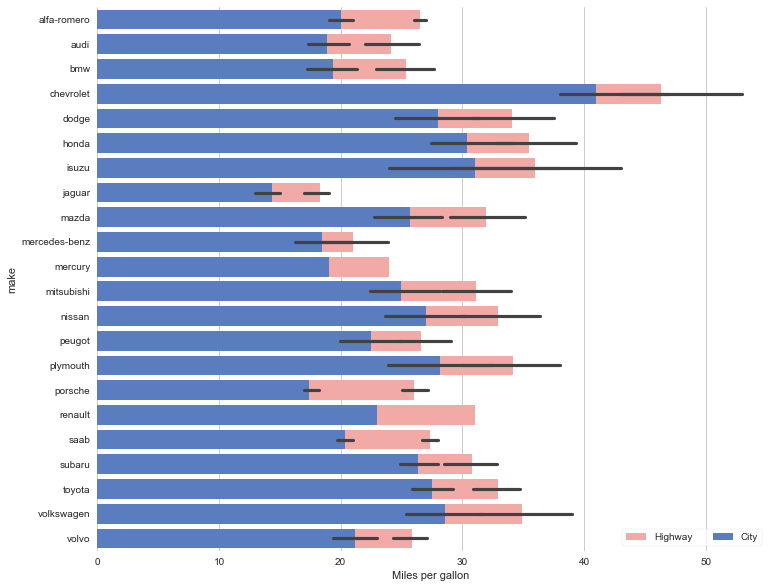

In [40]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the highway-mpg
sns.set_color_codes("pastel")
sns.barplot(x="highway-mpg", y="make", data=aut,
            label="Highway", color="r")
aut.sort_values(by='highway-mpg', ascending =True)
# Plot the city-mpg
sns.set_color_codes("muted")
sns.barplot(x="city-mpg", y="make", data=aut,
            label="City", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 55), ylabel="make",
       xlabel="Miles per gallon ")
sns.despine(left=True, bottom=True)

plt.show()

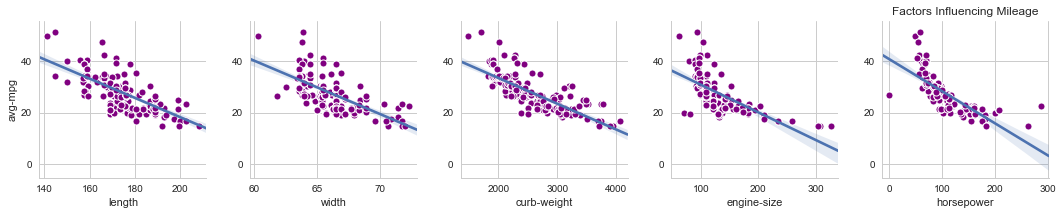

In [41]:
h = sns.PairGrid(aut, x_vars=["length", "width", "curb-weight","engine-size", "horsepower"], y_vars=["avg-mpg"],size=3)
h = h.map(sns.regplot)
h = h.map(plt.scatter, linewidths=1, edgecolor="w", s=50, color='purple')
plt.title('Average Mileage of Cars')

plt.title('Factors Influencing Mileage')
sns.set(font_scale=1.3)
plt.show()

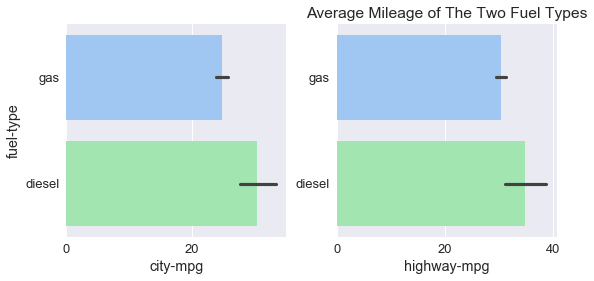

In [42]:
h = sns.PairGrid(aut, x_vars=["city-mpg","highway-mpg"], y_vars=["fuel-type"],size=4)
h = h.map(sns.barplot, palette='pastel')
plt.title('Average Mileage of The Two Fuel Types')
sns.set(font_scale=2)

plt.show()

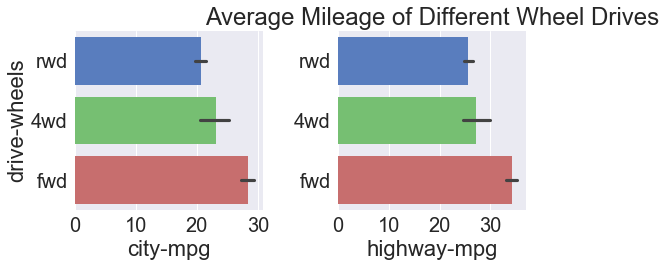

In [43]:
i = sns.PairGrid(aut, x_vars=["city-mpg","highway-mpg"], y_vars=["drive-wheels"],size=4)
i = i.map(sns.barplot, palette='muted', order = ['rwd','4wd','fwd'])
plt.title('Average Mileage of Different Wheel Drives')
sns.set(font_scale=1.2)
plt.show()

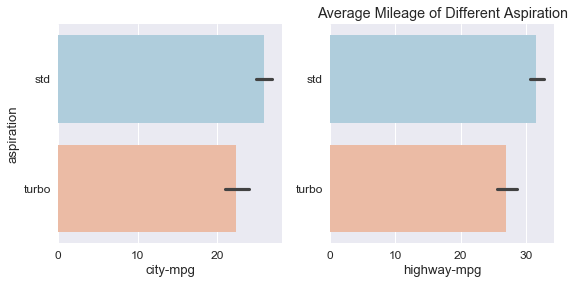

In [44]:
k = sns.PairGrid(aut, x_vars=["city-mpg","highway-mpg"], y_vars=["aspiration"],size=4)
k = k.map(sns.barplot, palette='RdBu_r')
plt.title('Average Mileage of Different Aspiration')
sns.set(font_scale=1.7)
plt.show()

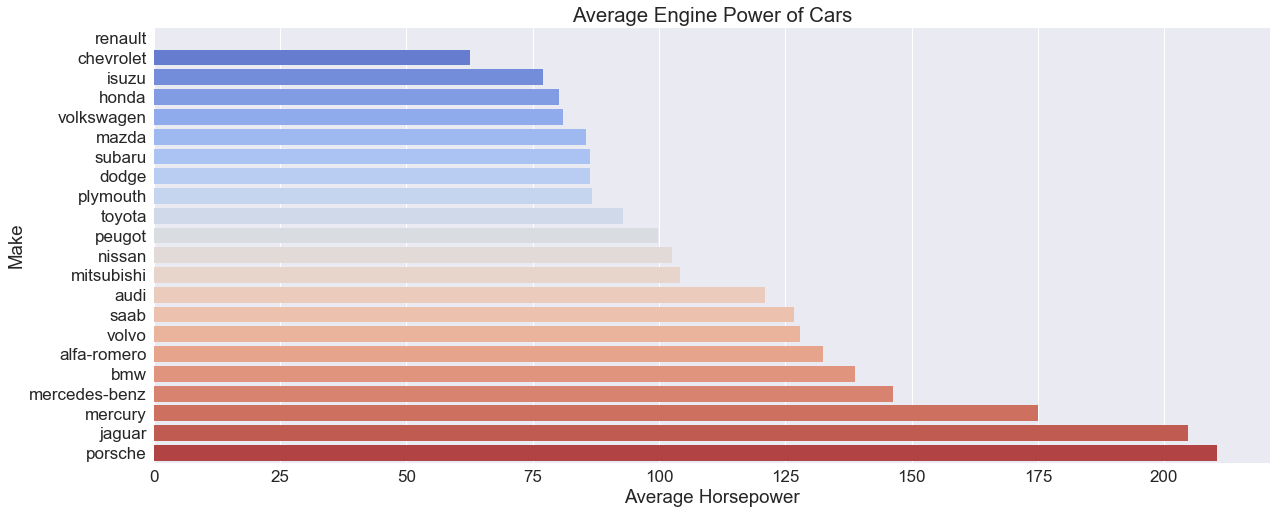

In [45]:
#Performance
prfm_table = pd.pivot_table(aut, values='horsepower', index='make', aggfunc=np.mean)
prfm_table = prfm_table.sort_values(by='horsepower', ascending=True)
prfm_table = prfm_table.reset_index()
round(mpg_table,2)

plt.figure(figsize=(20,8))
plt.title('Average Engine Power of Cars')
sns.set(font_scale=1.5)
sns.barplot(data=prfm_table, y='make', x='horsepower', palette='coolwarm')
plt.xlabel('Average Horsepower')
plt.ylabel('Make')

plt.show()

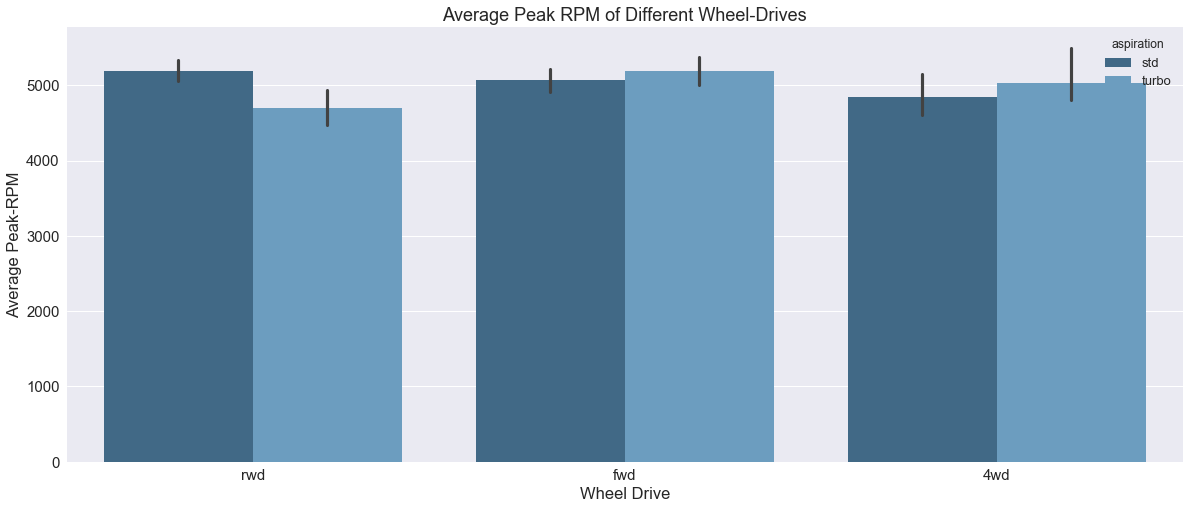

In [46]:
plt.figure(figsize=(20,8))
plt.title('Average Peak RPM of Different Wheel-Drives')
sns.set(font_scale=1.3)
sns.barplot(data=aut, x='drive-wheels', y='peak-rpm', hue='aspiration', palette='Blues_d')
plt.xlabel('Wheel Drive')
plt.ylabel('Average Peak-RPM')
plt.show()


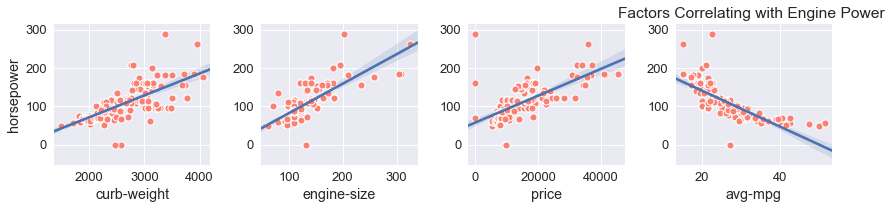

In [47]:
n = sns.PairGrid(aut, x_vars=["curb-weight", "engine-size", "price","avg-mpg"], y_vars=["horsepower"],size=3)
n = n.map(sns.regplot)
n = n.map(plt.scatter, linewidths=1, edgecolor="w", s=50, color='salmon')
plt.title('Factors Correlating with Engine Power ')
sns.set(font_scale=1.3)
plt.show()

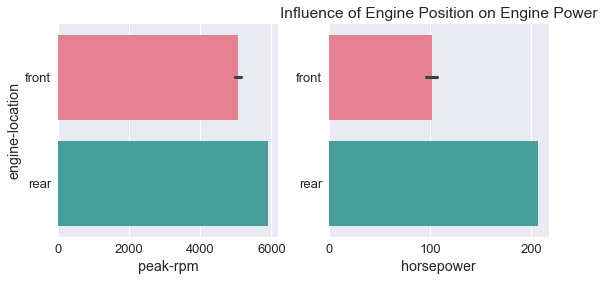

In [48]:
o = sns.PairGrid(aut, x_vars=["peak-rpm","horsepower"], y_vars=["engine-location"],size=4)
o = o.map(sns.barplot, palette='husl')
plt.title('Influence of Engine Position on Engine Power')
sns.set(font_scale=1.5)
plt.show()